# Group 6: Artificial Intelligence Techniques Assignment

1. [SECTION 1: INTRODUCTION](#SECTION-1:-INTRODUCTION)
   
2. [SECTION 2: METHOD](#SECTION-2:-METHOD)
   1. [2.1: Data Description](#2.1:-Data-Description)
   2. [2.2: Data Exploration & Visualization](#2.2:-Data-Exploration-&-Visualization)
   3. [2.3: Data Preprocessing](#2.3:-Data-Preprocessing)
   4. [2.4: Model Training & Validation](#2.4:-Model-Training-&-Validation)
       1. [Model 1: Support-Vector-Machine (One Vs All Classifier)](#Model-1:-Support-Vector-Machine (One Vs All Classifier) )
       2. [Model 2: Random Forest Classifier](#Model-2:-Random-Forest-Classifier)
       3. [Model 3: Logistic Regression (Multinomial)](#Model-3:-Logistic-Regression-(Multinomial))
   5. [2.5: Model Tuning and Testing](#2.5:-Model-Tuning-and-Testing)


# SECTION 1: INTRODUCTION

# SECTION 2: METHOD


In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score, 
    roc_auc_score, accuracy_score, classification_report, 
    confusion_matrix, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
# Load the dataset
ds = pd.read_csv('dataset.csv')

The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 

## 2.1: Data Description

In [265]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
ds.head()

First Few Rows of the Dataset:


,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [266]:
# Display some important information of the data set
print("\nInformation of the data set:")
ds.info()


Information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV        

In [267]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")


Shape of the Dataset:
Rows: 2100, Columns: 18


In [268]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
ds.isnull().any()


Missing Values in Each Column:


Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [269]:
# Display basic statistical information about the numerical columns
print("\nBasic Statistics of Numerical Features:")
ds.describe()


Basic Statistics of Numerical Features:


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [270]:
# Display unique values in categorical columns to understand their distribution
categorical_columns = ds.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {ds[col].unique()}")


Unique Values in Categorical Features:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


## 2.2: Data Exploration & Visualization

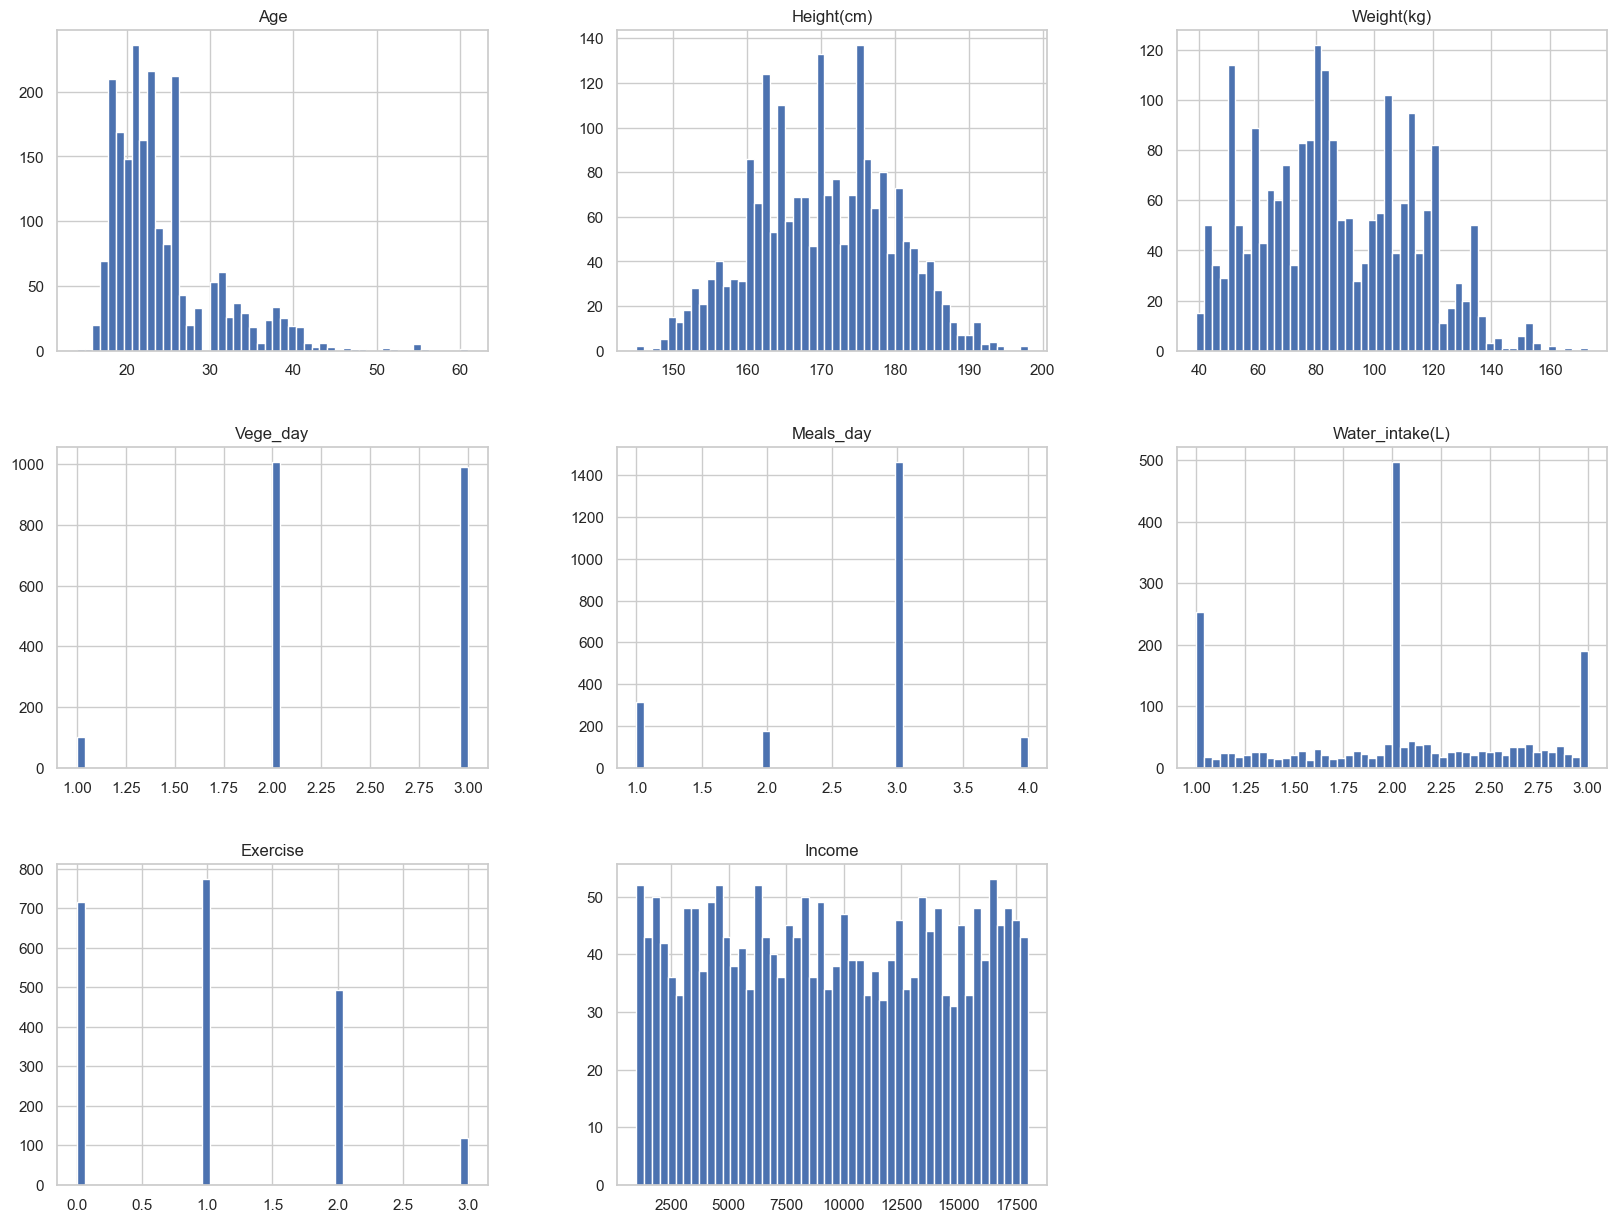

In [271]:
# Plotting histograms for all numerical features
ds.hist(bins=50, figsize=(20, 15))
plt.show()

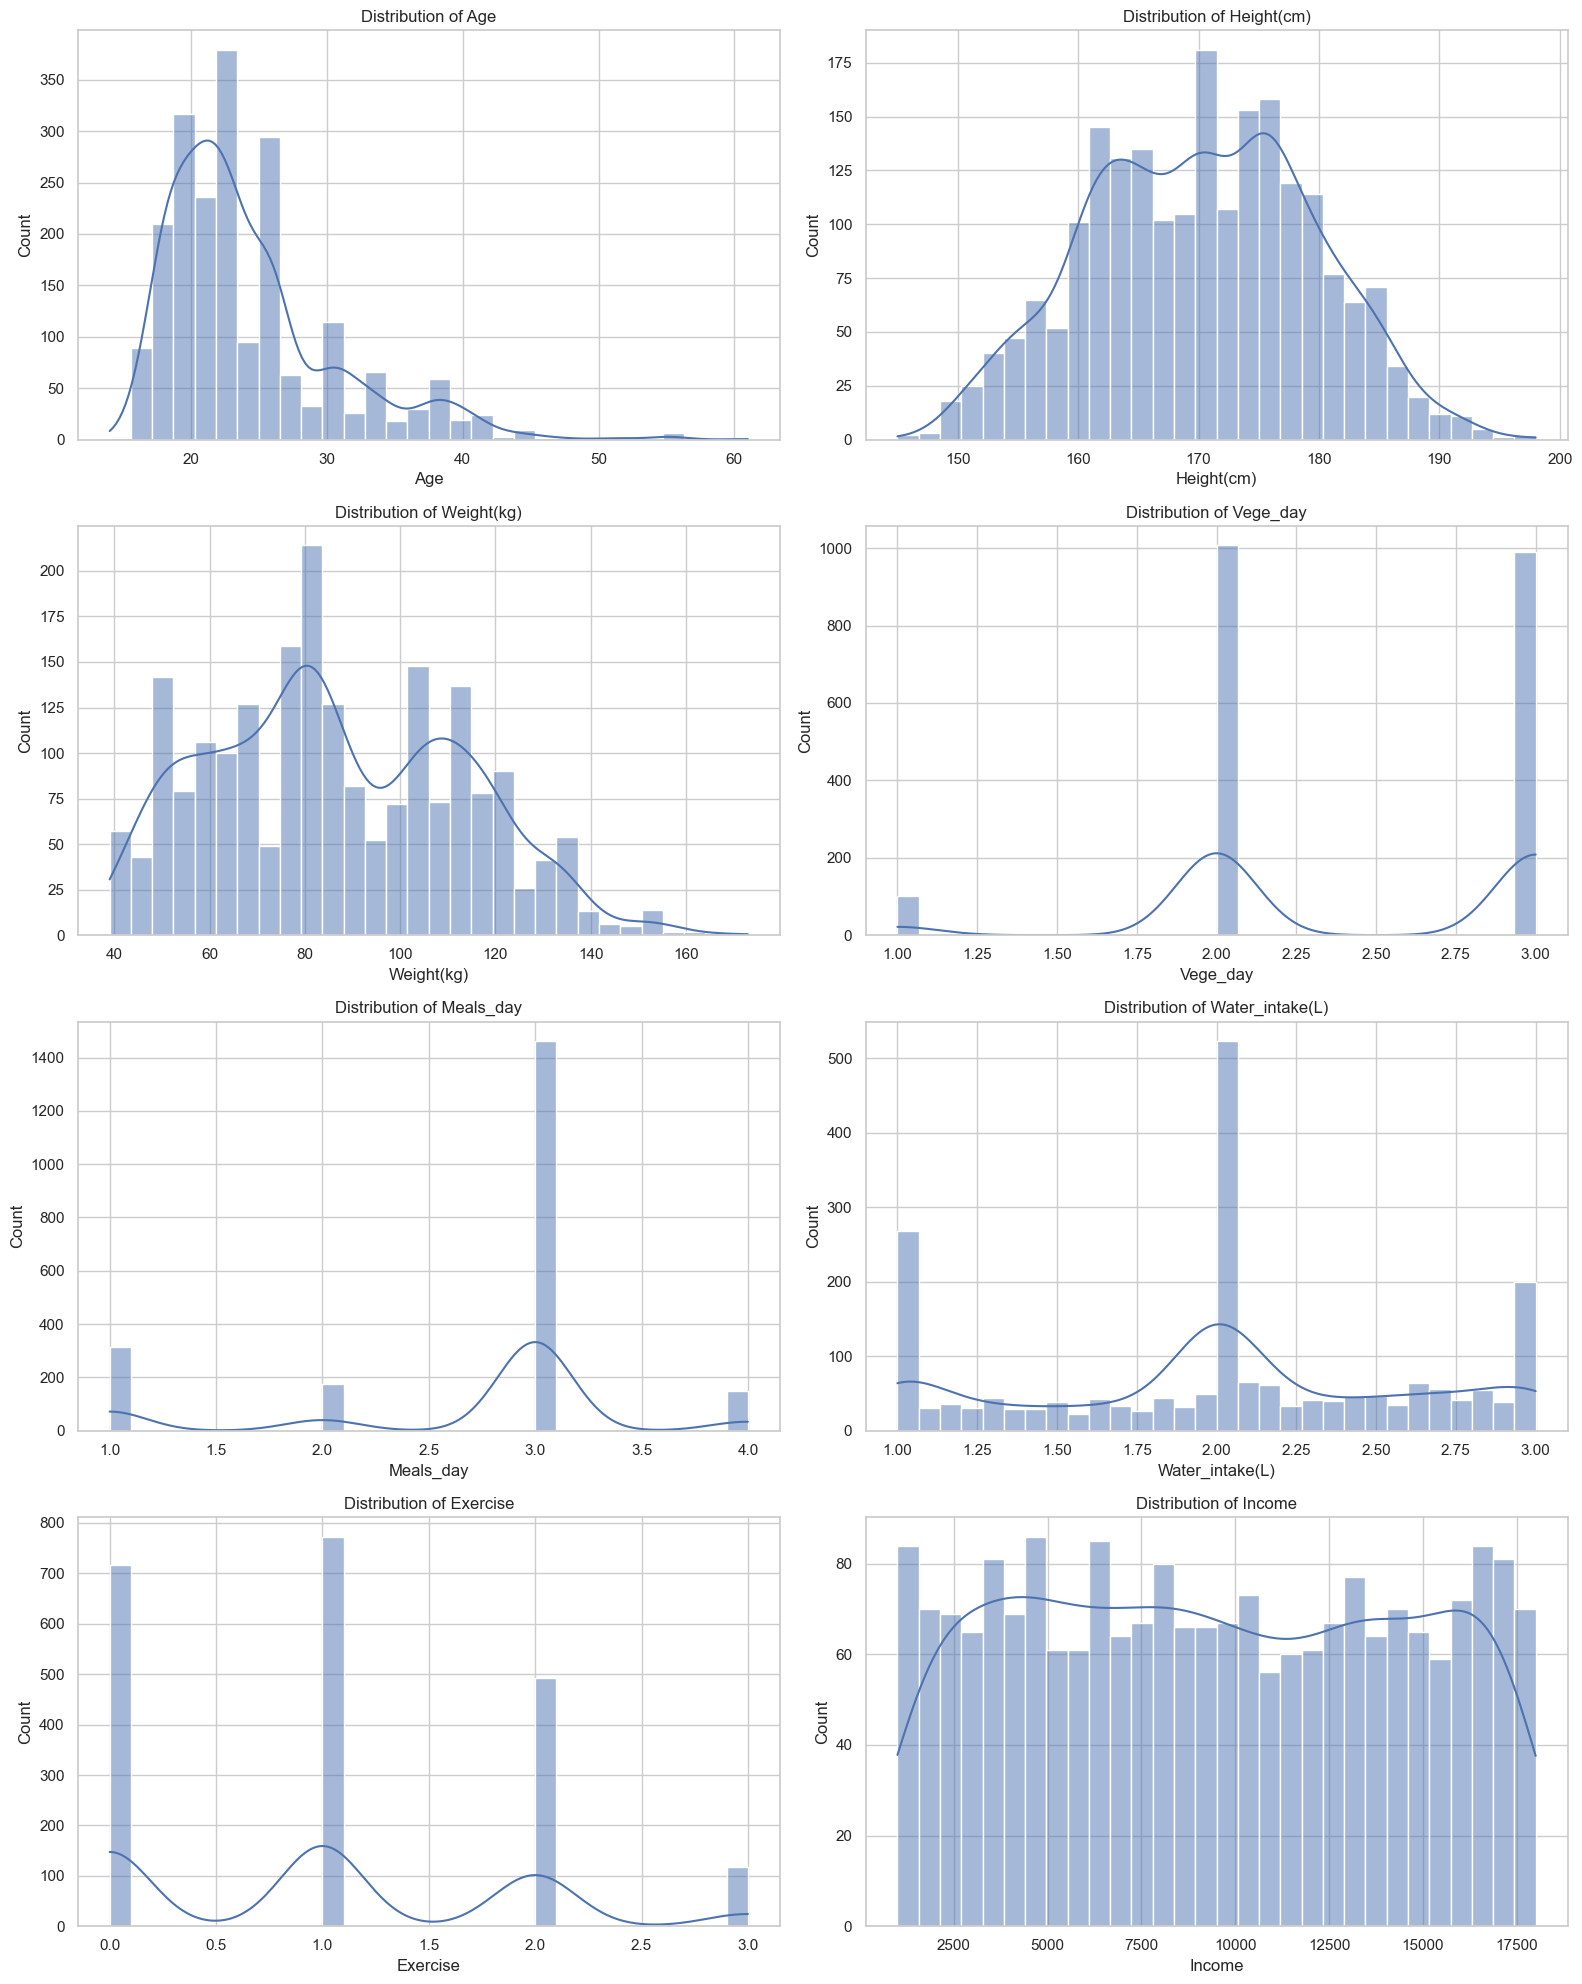

In [272]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a grid of subplots with 4 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Loop through each numerical feature to create individual histograms
for i, feature in enumerate(numerical_features):
    # Plot histogram for each numerical feature with KDE (Kernel Density Estimate) overlaid
    sns.histplot(ds[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    
    # Set the title for each subplot to indicate which feature is being plotted
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

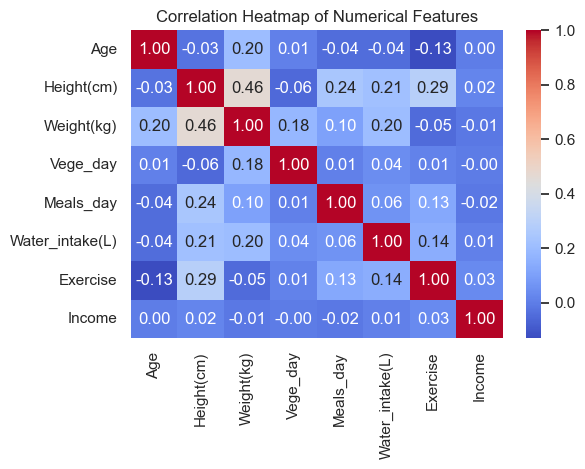

In [273]:
# Calculate the correlation matrix for numerical features only
numerical_ds = ds.select_dtypes(include=[float, int])
corr_matrix = numerical_ds.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


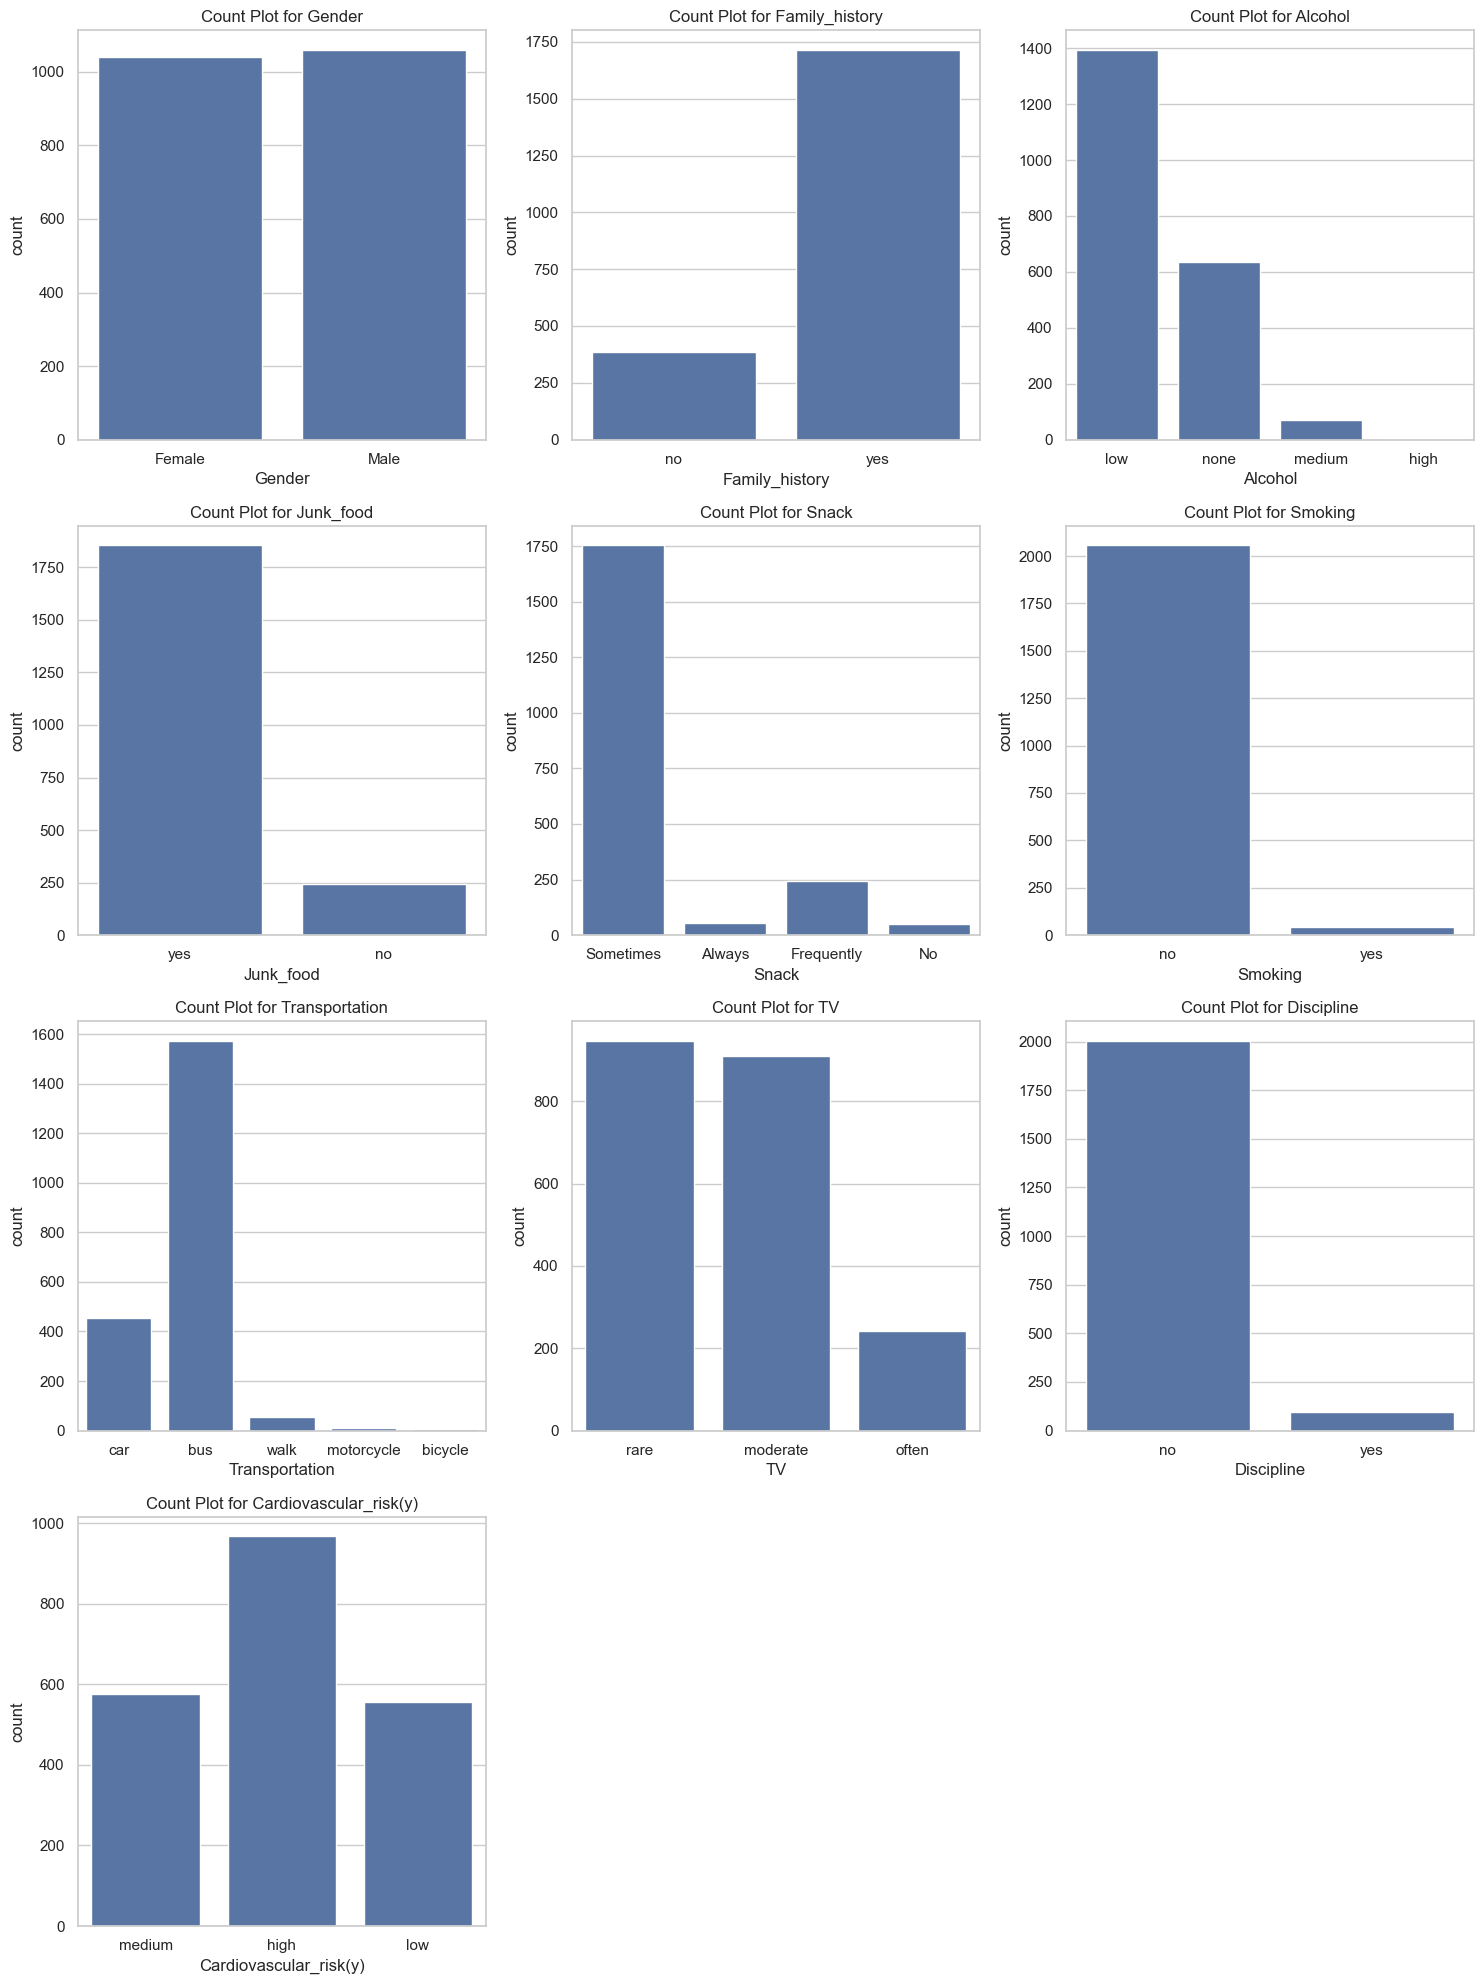

In [274]:
# Automatically identify all categorical features in the dataset
categorical_features = ds.select_dtypes(include=['object']).columns.tolist()

# Set up the number of rows and columns for the grid
n_rows = (len(categorical_features) + 2) // 3  # Calculate number of rows needed (3 columns per row)
n_cols = 3  # You can adjust this based on how many columns you want per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a count plot on a subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=ds, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

# Hide any empty subplots if the grid is larger than the number of features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

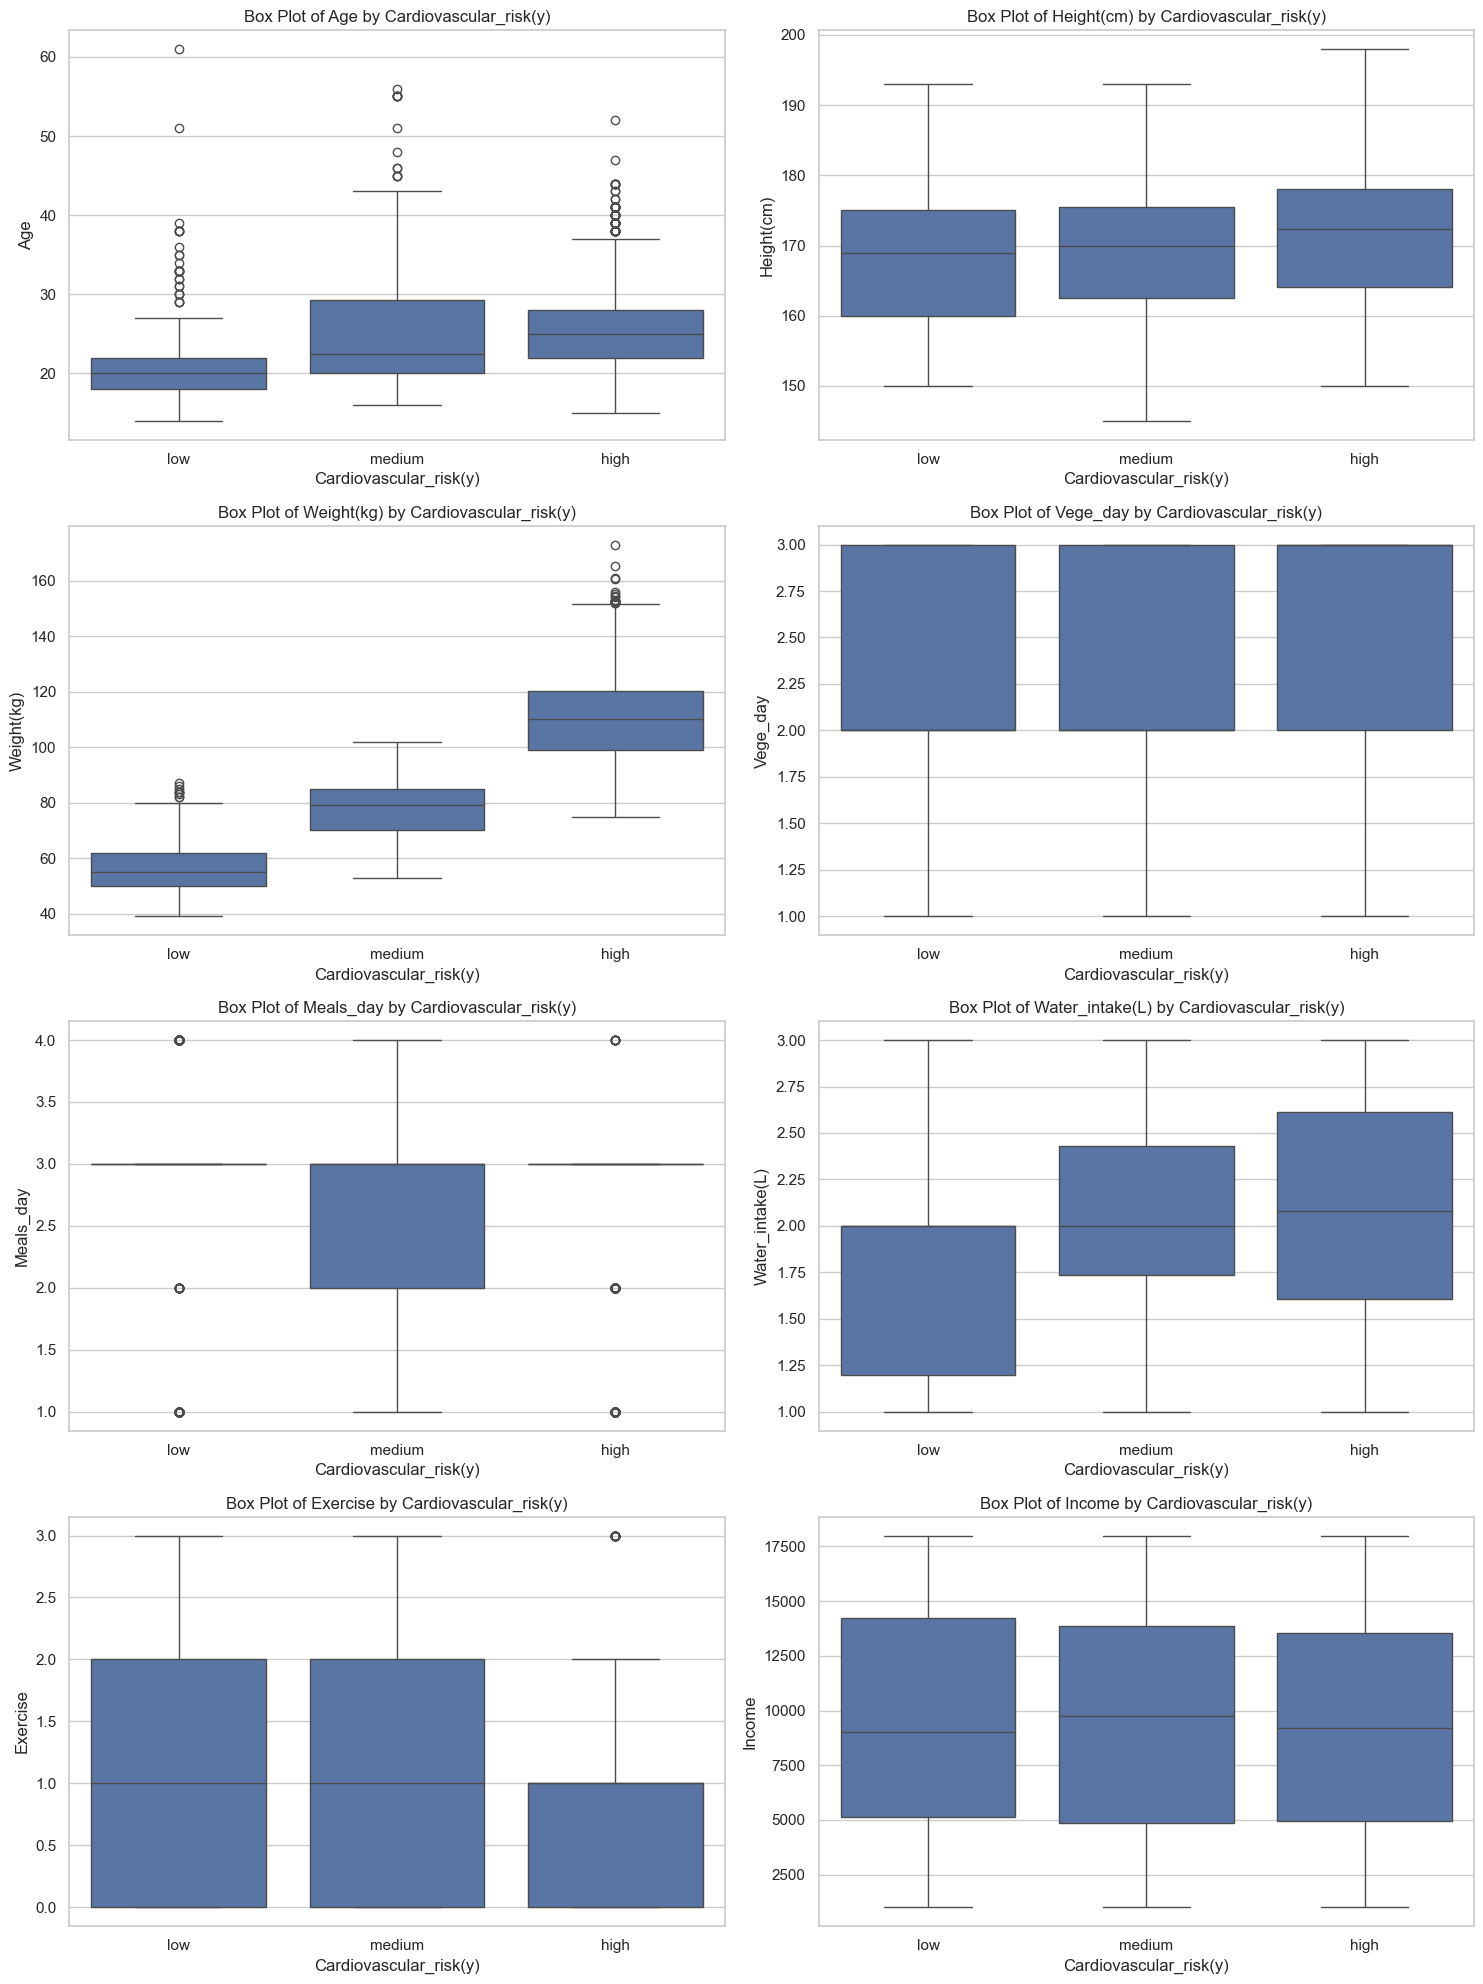

In [275]:
# Load your dataset (assuming it is loaded as 'ds')
# ds = pd.read_csv('dataset.csv')  # Uncomment and modify if the dataset needs to be loaded

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Define the categorical variable for comparison
categorical_variable = 'Cardiovascular_risk(y)'  # Replace with your actual categorical variable

# Specify the desired order of categories
category_order = ['low', 'medium', 'high']

# Set up the number of rows and columns for the grid
n_rows = (len(numerical_features) + 1) // 2  # Calculate number of rows needed (2 columns per row)
n_cols = 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot on a subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=categorical_variable, y=feature, data=ds, ax=axes[i], order=category_order)
    axes[i].set_title(f'Box Plot of {feature} by {categorical_variable}')
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel(feature)

# Hide any empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 2.3: Data Preprocessing 

## Training Set


In [276]:


# Assuming ds is already loaded
X = ds.drop('Cardiovascular_risk(y)', axis=1)
y = ds['Cardiovascular_risk(y)']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Separate numerical and categorical columns
X_train_num = X_train.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_train_cat_nom = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]  # Nominal
X_train_cat_ord = X_train[['Alcohol', 'Snack', 'TV']]  # Ordinal

# Standardize numeric data
scaler = StandardScaler()
X_train_num_tr = scaler.fit_transform(X_train_num)

# One-hot encode nominal categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False)  # Ensure dense output for stacking later
X_train_cat_nom_encoded = onehot_encoder.fit_transform(X_train_cat_nom)


# Define the order for ordinal variables if needed (e.g., Alcohol: ['Never', 'Sometimes', 'Often'])
# You can specify your own ordering of the ordinal features below if applicable
ord_categories = [['low' ,'none' ,'medium' ,'high'],  # Example for Alcohol
                  ['No','Sometimes','Frequently', 'Always' ],  # Example for Snack
                  ['rare', 'moderate' ,'often']] # Example for TV

ordinal_encoder = OrdinalEncoder(categories=ord_categories)
X_train_cat_ord_encoded = ordinal_encoder.fit_transform(X_train_cat_ord)

# Check the mapping for ordinal variables
print("OrdinalEncoder Ordinal Categories Mapping:")

for i, feature in enumerate(X_train_cat_ord.columns):
    print(f"Feature '{feature}' is encoded as follows:")
    for category, encoding in zip(ordinal_encoder.categories_[i], range(len(ordinal_encoder.categories_[i]))):
        print(f"  {category}: {encoding}")  


# Combine the transformed nominal and ordinal categorical data
X_train_cat_encoded = np.hstack([X_train_cat_nom_encoded, X_train_cat_ord_encoded])

# Combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_encoded])
# Convert y_train to numpy array
y_train = y_train.values


OrdinalEncoder Ordinal Categories Mapping:
Feature 'Alcohol' is encoded as follows:
  low: 0
  none: 1
  medium: 2
  high: 3
Feature 'Snack' is encoded as follows:
  No: 0
  Sometimes: 1
  Frequently: 2
  Always: 3
Feature 'TV' is encoded as follows:
  rare: 0
  moderate: 1
  often: 2


## Testing Set

In [277]:
# Separate numerical and categorical columns for the test set
X_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_test_cat_nom = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]  # Nominal
X_test_cat_ord = X_test[['Alcohol', 'Snack', 'TV']]  # Ordinal

# # Impute missing values in numeric columns of the test set with the median (use already fitted imputer)
# X_test_num_tr = imputer.transform(X_test_num)

# Standardize numeric data for the test set (use already fitted scaler)
X_test_num_tr = scaler.transform(X_test_num)

# One-hot encode nominal categorical variables in the test set (use already fitted onehot_encoder)
X_test_cat_nom_encoded = onehot_encoder.transform(X_test_cat_nom)

# Ordinal encode ordinal categorical variables in the test set (use already fitted ordinal_encoder)
X_test_cat_ord_encoded = ordinal_encoder.transform(X_test_cat_ord)

# Combine the transformed nominal and ordinal categorical data for the test set
X_test_cat_encoded = np.hstack([X_test_cat_nom_encoded, X_test_cat_ord_encoded])

# Combine the transformed numerical and categorical sets for the test set
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])

# Convert y_test to numpy array
y_test = y_test.values


In [278]:
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 26)
y_train shape: (1680,)
X_test_tr shape: (420, 26)
y_test shape: (420,)


## 2.4: Model Training & Validation

## Function for PR , ROC curve and AUC score

In [279]:
# Function to plot ROC curve
def plot_multiclass_pr_roc_curves(y_true, y_pred_scores, class_labels, model):
    """
    Plot ROC curves for multi-class classification using the SGD decision function.
    
    Parameters:
    y_true (array-like): True labels
    y_pred_scores (array-like): Decision function outputs from SGDClassifier
    class_labels (list): List of class labels
    model (str): The name of the model being evaluated
    
    Returns:
    dict: Dictionary containing AUC scores for each class
    """
    # Binarize the true labels (One-vs-Rest) for multiclass
    y_true_bin = label_binarize(y_true, classes=class_labels)
    n_classes = y_true_bin.shape[1]

    # ROC Curve
    plt.figure(figsize=(10, 6))
    auc_scores = {}

    auc_pr_scores = {}
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores[class_labels[i]] = roc_auc
        plt.plot(fpr, tpr, lw=3, label=f'{class_labels[i]} (area = {roc_auc:.4f})')
    
    # Plot diagonal line (chance)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'One-vs-Rest ROC Curves for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

     # Precision-Recall Curves
    plt.figure(figsize=(10, 6))

    for i in range(n_classes):
        precisions, recalls, _ = precision_recall_curve(y_true_bin[:, i], y_pred_scores[:, i])
        pr_auc = auc(recalls, precisions)
        auc_pr_scores[class_labels[i]] = pr_auc
        plt.plot(recalls, precisions, lw=3, label=f'{class_labels[i]} (PR AUC = {pr_auc:.4f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(f'One-vs-Rest Precision-Recall Curves for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

    print("ROC AUC Scores:")
    for label, score in auc_scores.items():
        print(f'AUC (ROC) {label} = {score:.4f}')
    
    print("\nPrecision-Recall AUC Scores:")
    for label, score in auc_pr_scores.items():
        print(f'AUC (PR) {label} = {score:.4f}')
    return {"auc_scores": auc_scores, "pr_auc_scores": auc_pr_scores}
# Step 7: Get class labels from the training set
class_labels = np.unique(y_train)  # List of class labels



# Model 1: Support Vector Machine (One Vs All Classifier) 

In [229]:

# Step 1: Create the SVC classifier

svm_clf = SVC(kernel='linear', probability=True, random_state=69)

# Wrap it with OneVsRestClassifier
ovr_clf = OneVsRestClassifier(svm_clf)

# Train the model
ovr_clf.fit(X_train_tr, y_train)

# Step 3: Predict on the training data
y_train_pred = ovr_clf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(ovr_clf, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9530
Cross-validation scores: [0.93571429 0.95178571 0.92678571]
Mean cross-validation score: 0.9381
Confusion Matrix:
[[770   0   5]
 [  0 431  12]
 [ 23  39 400]]


# Cross Validation and ROC curve

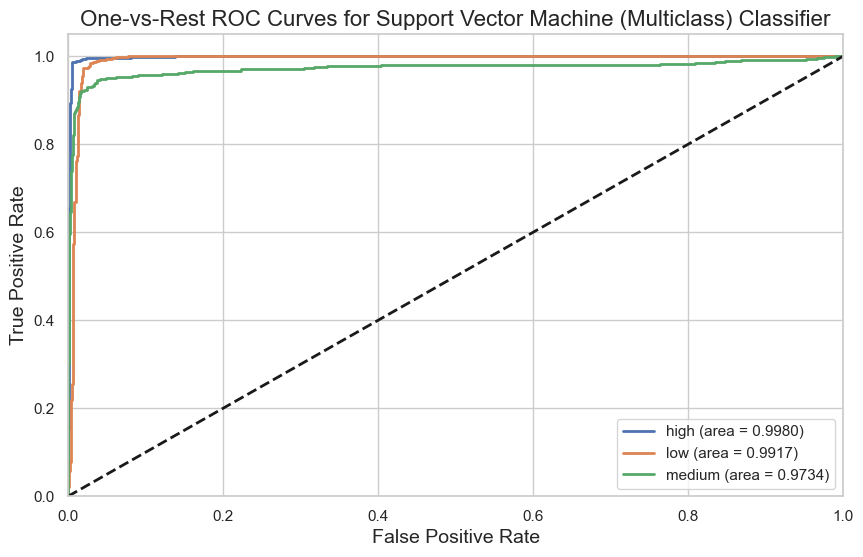

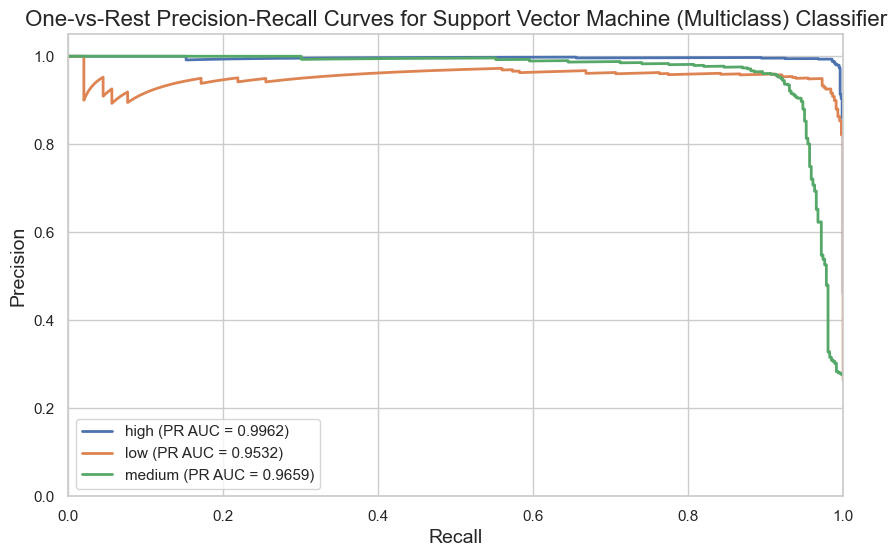

ROC AUC Scores:
AUC (ROC) high = 0.9980
AUC (ROC) low = 0.9917
AUC (ROC) medium = 0.9734

Precision-Recall AUC Scores:
AUC (PR) high = 0.9962
AUC (PR) low = 0.9532
AUC (PR) medium = 0.9659


In [211]:
y_pred_cv = cross_val_predict(ovr_clf,X_train_tr,y_train,cv=3,method="predict_proba")
scores  = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, "Support Vector Machine (Multiclass) Classifier")

# Evaluation on Test Set

In [214]:
# Predict on the test set
y_test_pred = ovr_clf.predict(X_test_tr)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Accuracy on test set: 0.9262
Precision (macro) = 0.9197
Recall (macro)    = 0.9117
F1 score (macro)  = 0.9139

Confusion Matrix (Test Set):
[[190   0   2]
 [  0 108   6]
 [  9  14  91]]


## Model 2: Random Forest Classifier

In [215]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=69)

# Train the model on the training data
rf_model.fit(X_train_tr, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train_tr)  # Predict using the training set

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")
# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy on training set: 1.0000
Cross-validation scores: [0.95357143 0.96071429 0.94642857]
Mean cross-validation score: 0.9536
Confusion Matrix:
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


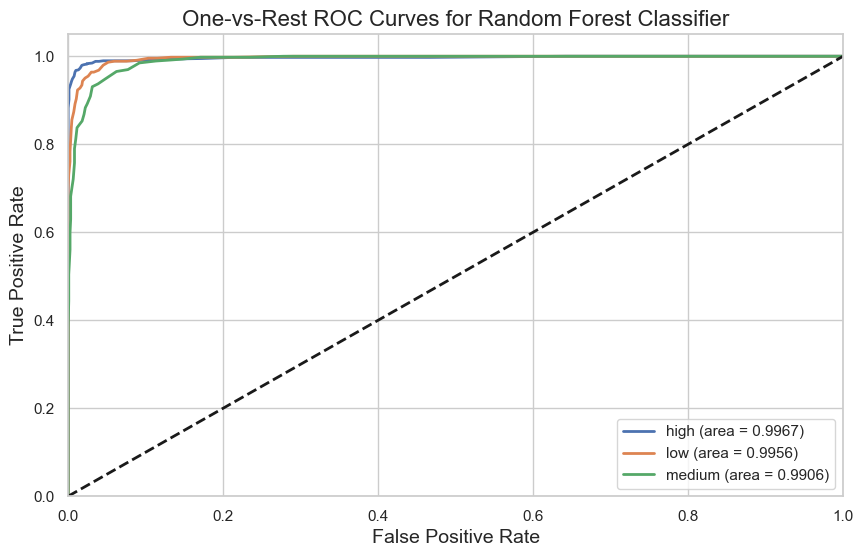

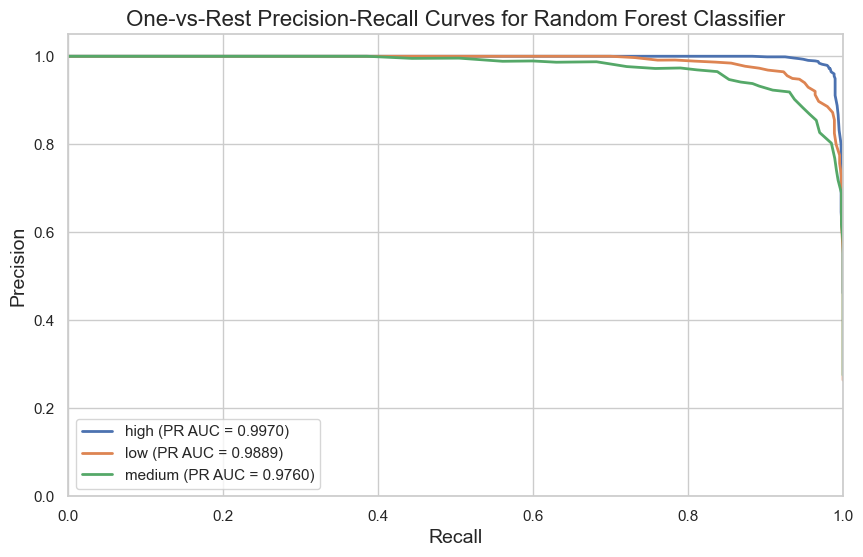

ROC AUC Scores:
AUC (ROC) high = 0.9967
AUC (ROC) low = 0.9956
AUC (ROC) medium = 0.9906

Precision-Recall AUC Scores:
AUC (PR) high = 0.9970
AUC (PR) low = 0.9889
AUC (PR) medium = 0.9760


In [216]:
y_pred_cv = cross_val_predict(rf_model,X_train_tr,y_train,cv=3, method="predict_proba")
auc_scores = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, 'Random Forest Classifier')

## Evaluate model on test set

In [217]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test_tr)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))


# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Accuracy on test set: 0.9571
Precision (macro) = 0.9496
Recall (macro)    = 0.9497
F1 score (macro)  = 0.9493

Confusion Matrix (Test Set):
[[190   0   2]
 [  0 104  10]
 [  1   5 108]]


## Model 3: Logistic Regression (Multinomial)

In [29]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=69)

# Train the model on the training data
log_reg.fit(X_train_tr, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_train_tr)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy:.4f}')

cross_val_scores = cross_val_score(log_reg, X_train_tr, y_train, cv=3)
print(f'\nCross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {cross_val_scores.mean():.4f}')
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9821

Cross-validation scores: [0.9625     0.96785714 0.96964286]
Average cross-validation score: 0.9667
Confusion Matrix:
[[770   0   5]
 [  0 425  18]
 [  0   7 455]]


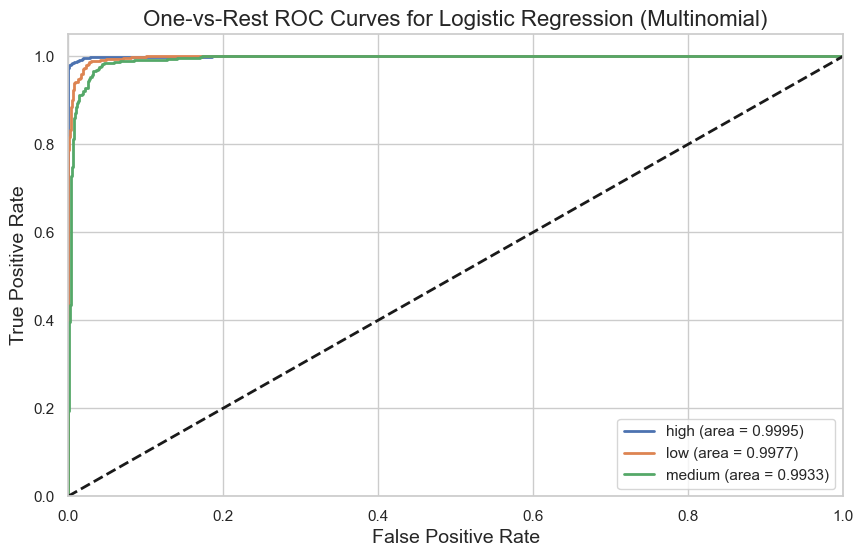

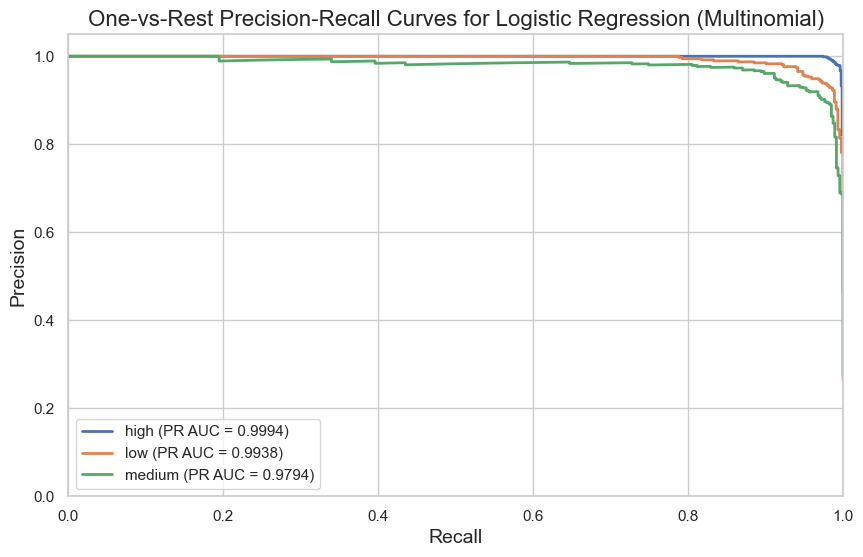

ROC AUC Scores:
AUC (ROC) high = 0.9995
AUC (ROC) low = 0.9977
AUC (ROC) medium = 0.9933

Precision-Recall AUC Scores:
AUC (PR) high = 0.9994
AUC (PR) low = 0.9938
AUC (PR) medium = 0.9794


In [218]:
y_pred_cv = cross_val_predict(log_reg,X_train_tr,y_train,cv=3,method = "predict_proba")
auc_scores = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, 'Logistic Regression (Multinomial)')

In [32]:
# For multiclass, specify the average method
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_cv, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_cv, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_cv, average='macro')))

Precision (macro) = 0.9620
Recall (macro)    = 0.9623
F1 score (macro)  = 0.9618


## Evaluation with Test Set

In [219]:
# Predict on the test data
y_pred = log_reg.predict(X_test_tr)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test set: {test_accuracy:.4f}')
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))


# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)



Accuracy on test set: 0.9714
Precision (macro) = 0.9496
Recall (macro)    = 0.9497
F1 score (macro)  = 0.9493

Classification Report (Test Set):
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       192
         low       1.00      0.92      0.96       114
      medium       0.91      0.99      0.95       114

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420


Confusion Matrix (Test Set):
[[190   0   2]
 [  0 105   9]
 [  1   0 113]]


## 2.5: Model Tuning and Testing

## SVM Classifier

In [233]:

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],        # Regularization parameter
    'estimator__kernel': ['linear', 'rbf'],   # Kernel type
    'estimator__gamma': ['scale', 'auto']  
}

# Initialize GridSearchCV for SGDClassifier
grid_search_svm = GridSearchCV(ovr_clf, param_grid, cv=3, scoring='accuracy')


# Fit GridSearchCV
grid_search_svm.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for SVMClassifier:", grid_search_svm.best_params_)
print("Best Cross-Validation Score for SVMClassifier:", grid_search_svm.best_score_)

Best Parameters for SVMClassifier: {'estimator__C': 100, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Best Cross-Validation Score for SVMClassifier: 0.9767857142857143


In [234]:
y_pred_at =grid_search_svm.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9869
Precision (macro) = 0.9860
Recall (macro)    = 0.9841
F1 score (macro)  = 0.9848
Confusion Matrix:
[[775   0   0]
 [  0 441   2]
 [  7  13 442]]


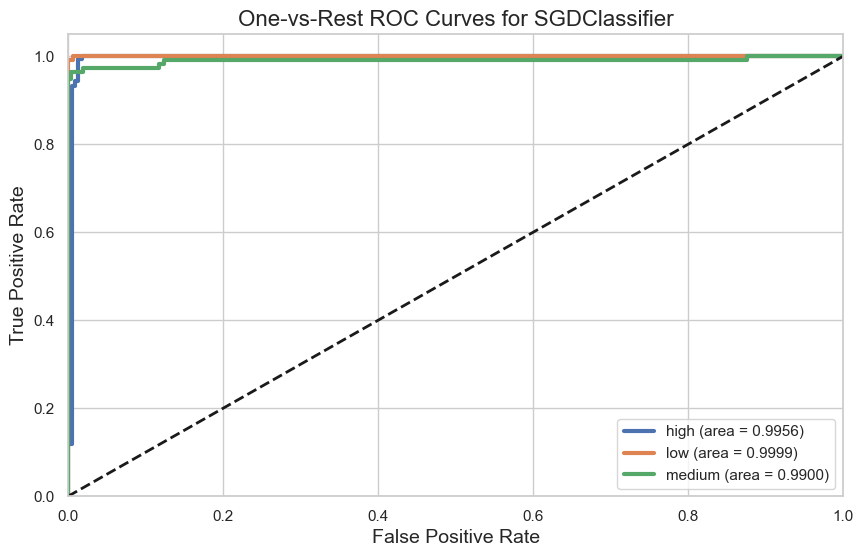

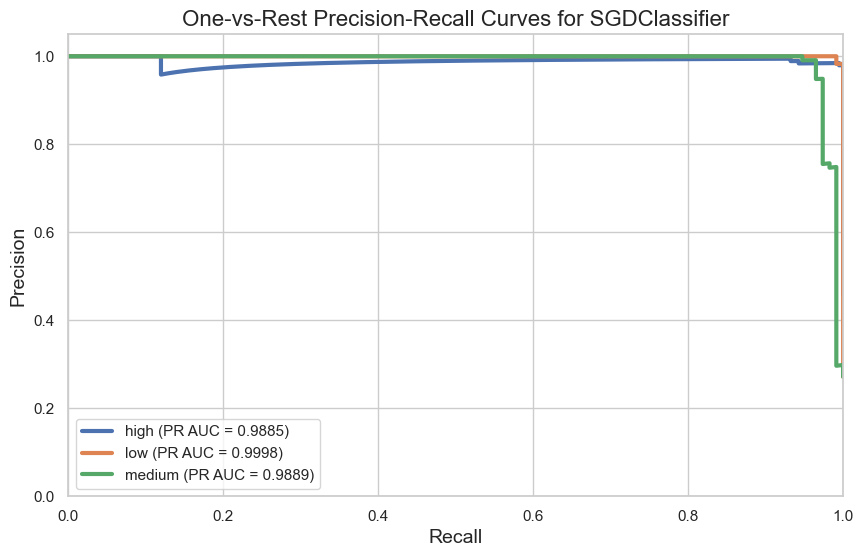

ROC AUC Scores:
AUC (ROC) high = 0.9956
AUC (ROC) low = 0.9999
AUC (ROC) medium = 0.9900

Precision-Recall AUC Scores:
AUC (PR) high = 0.9885
AUC (PR) low = 0.9998
AUC (PR) medium = 0.9889


In [236]:
y_pred_roc = grid_search_svm.predict_proba(X_test_tr)
auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'SVMClassifier')

## RandomForest Classifier

## Grid Search

In [230]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=69), param_grid_rf, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best Cross-Validation Score for RandomForestClassifier:", grid_search_rf.best_score_)

Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for RandomForestClassifier: 0.9577380952380953


In [232]:
y_pred_at = grid_search_rf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9982
Precision (macro) = 0.9978
Recall (macro)    = 0.9977
F1 score (macro)  = 0.9978
Confusion Matrix:
[[775   0   0]
 [  0 440   3]
 [  0   0 462]]


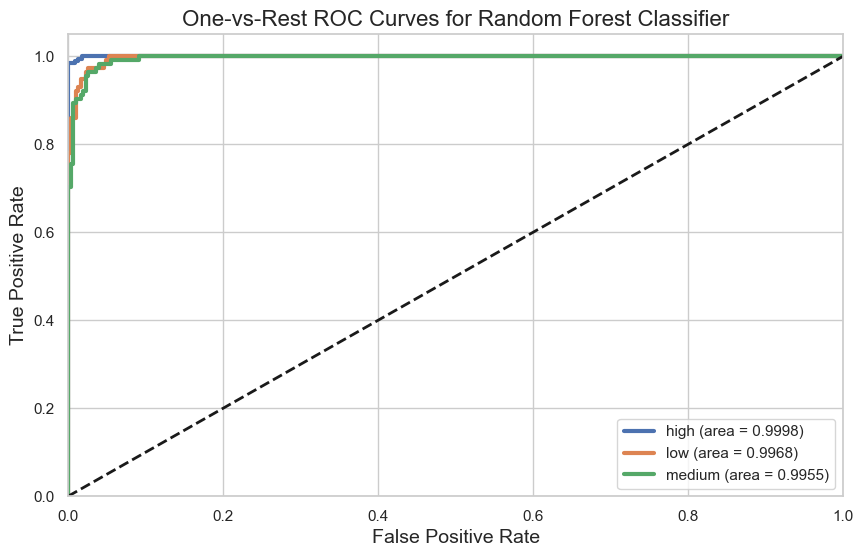

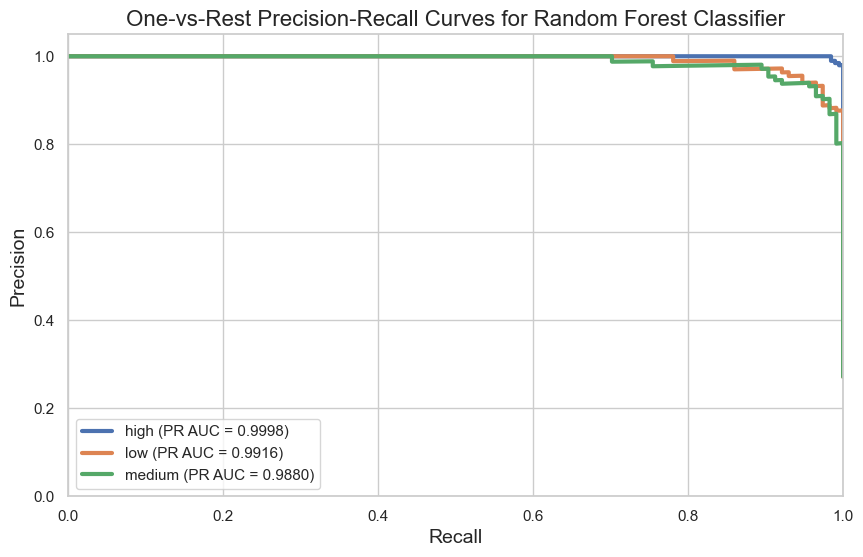

ROC AUC Scores:
AUC (ROC) high = 0.9998
AUC (ROC) low = 0.9968
AUC (ROC) medium = 0.9955

Precision-Recall AUC Scores:
AUC (PR) high = 0.9998
AUC (PR) low = 0.9916
AUC (PR) medium = 0.9880


In [237]:
y_pred_roc = grid_search_rf.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Random Forest Classifier')

## Logistic Classifier

In [247]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV for LogisticRegression use 3 cross-fold instead to avoid limit reach
grid_search_lr = GridSearchCV(LogisticRegression(random_state=69), param_grid_lr, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for LogisticRegression:", grid_search_lr.best_params_)
print("Best Cross-Validation Score for LogisticRegression:", grid_search_lr.best_score_)

Best Parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score for LogisticRegression: 0.9761904761904762


In [248]:
y_pred_at = grid_search_lr.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9935
Precision (macro) = 0.9921
Recall (macro)    = 0.9928
F1 score (macro)  = 0.9924
Confusion Matrix:
[[772   0   3]
 [  0 437   6]
 [  0   2 460]]


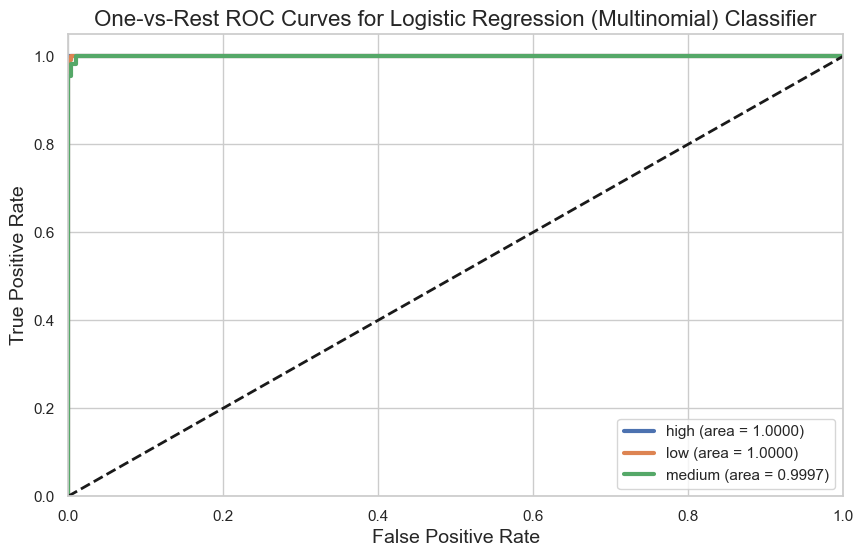

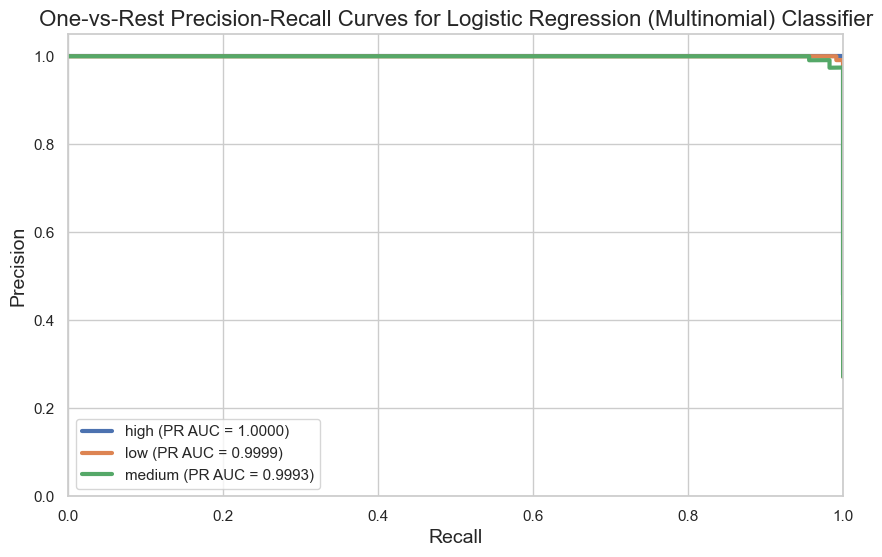

ROC AUC Scores:
AUC (ROC) high = 1.0000
AUC (ROC) low = 1.0000
AUC (ROC) medium = 0.9997

Precision-Recall AUC Scores:
AUC (PR) high = 1.0000
AUC (PR) low = 0.9999
AUC (PR) medium = 0.9993


In [251]:
y_pred_roc = grid_search_lr.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Logistic Regression (Multinomial) Classifier')

## Evaluate on test set

In [257]:
y_pred_chosen = grid_search_svm.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))

Accuracy on training set: 0.9881
Precision (macro) = 0.9902
Recall (macro)    = 0.9854
F1 score (macro)  = 0.9877


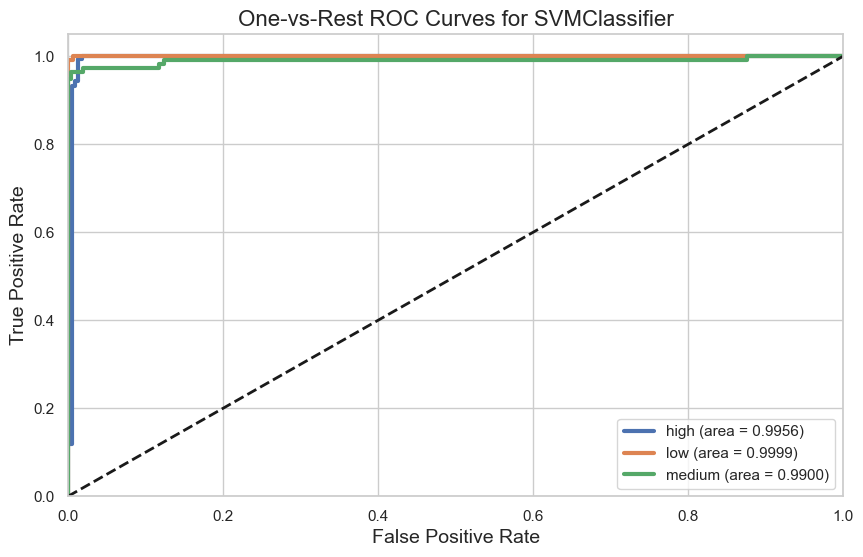

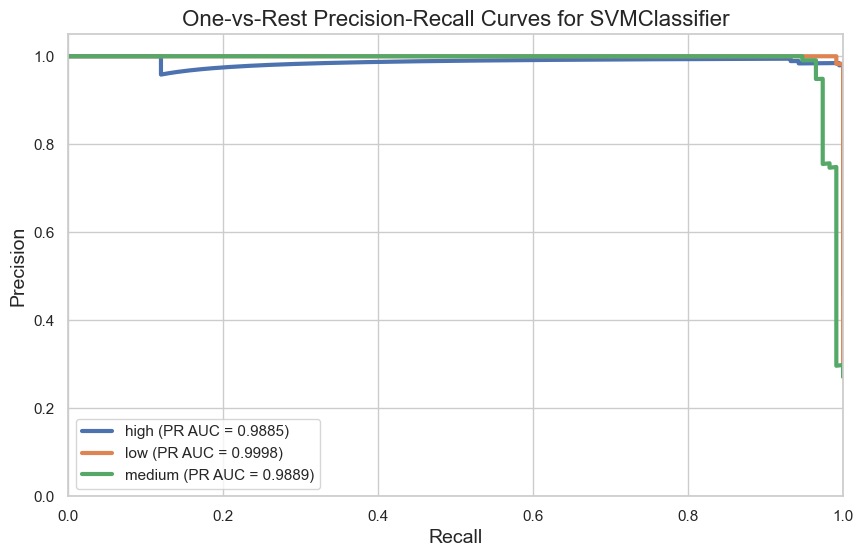

ROC AUC Scores:
AUC (ROC) high = 0.9956
AUC (ROC) low = 0.9999
AUC (ROC) medium = 0.9900

Precision-Recall AUC Scores:
AUC (PR) high = 0.9885
AUC (PR) low = 0.9998
AUC (PR) medium = 0.9889


In [258]:
y_pred_roc = grid_search_svm.predict_proba(X_test_tr)
auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'SVMClassifier')

In [259]:
y_pred_chosen = grid_search_rf.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))

Accuracy on training set: 0.9643
Precision (macro) = 0.9586
Recall (macro)    = 0.9573
F1 score (macro)  = 0.9574


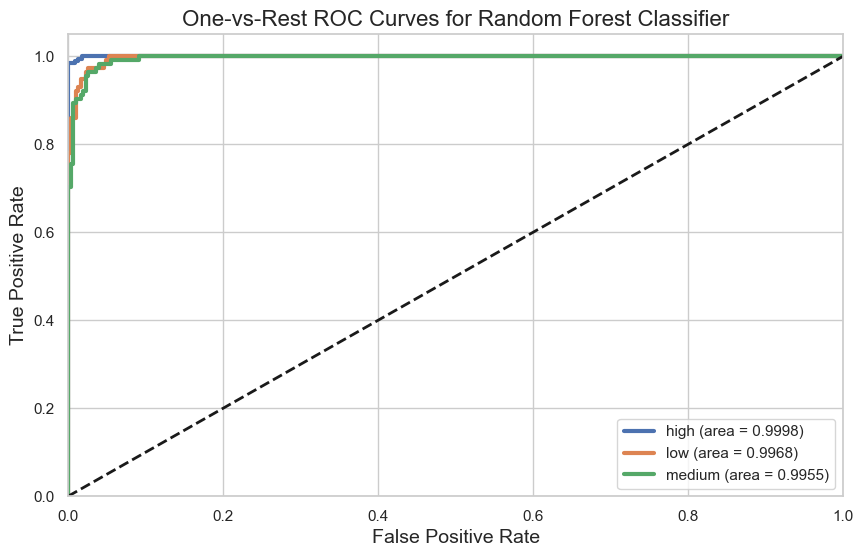

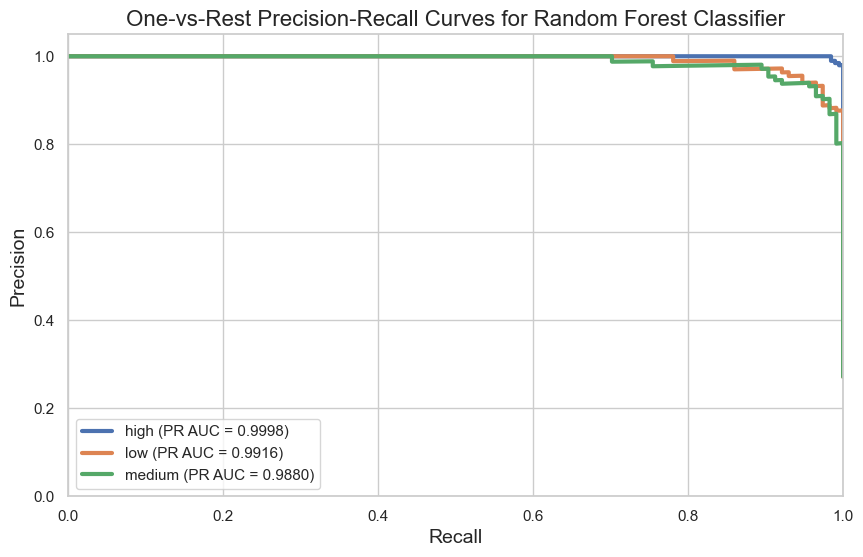

ROC AUC Scores:
AUC (ROC) high = 0.9998
AUC (ROC) low = 0.9968
AUC (ROC) medium = 0.9955

Precision-Recall AUC Scores:
AUC (PR) high = 0.9998
AUC (PR) low = 0.9916
AUC (PR) medium = 0.9880


In [260]:
y_pred_roc = grid_search_rf.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Random Forest Classifier')


In [261]:
y_pred_chosen = grid_search_lr.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))

Accuracy on training set: 0.9905
Precision (macro) = 0.9897
Recall (macro)    = 0.9883
F1 score (macro)  = 0.9889


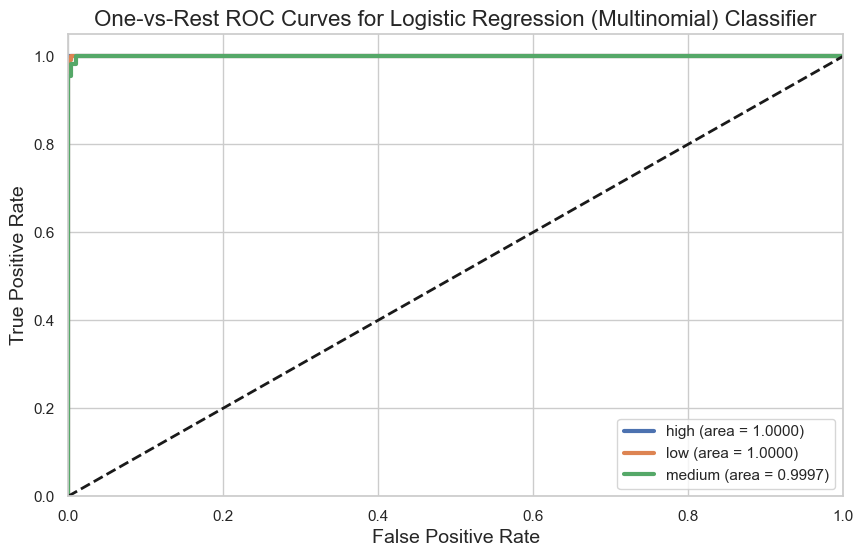

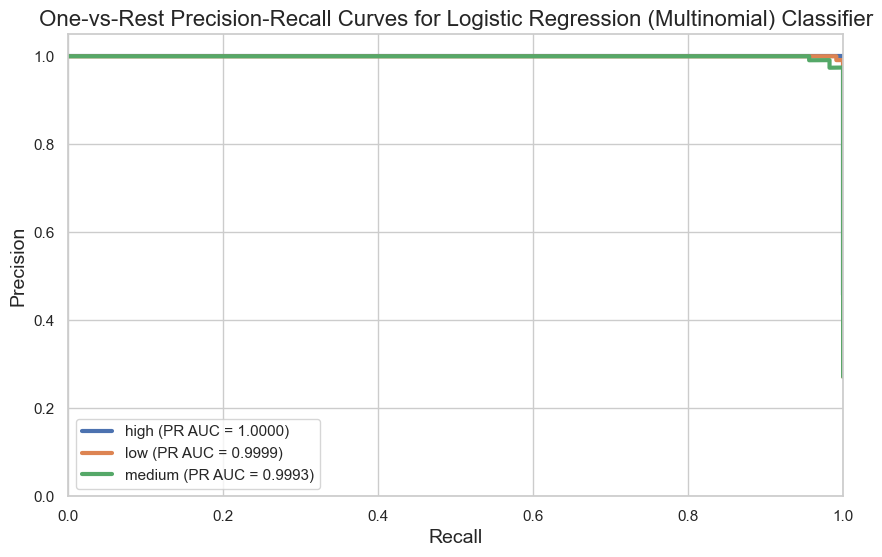

ROC AUC Scores:
AUC (ROC) high = 1.0000
AUC (ROC) low = 1.0000
AUC (ROC) medium = 0.9997

Precision-Recall AUC Scores:
AUC (PR) high = 1.0000
AUC (PR) low = 0.9999
AUC (PR) medium = 0.9993


In [262]:
y_pred_roc = grid_search_lr.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Logistic Regression (Multinomial) Classifier')


## Investigation on Feature Importance

In [242]:
# Numerical feature names
numerical_features = X_train_num.columns.tolist()

# Nominal feature names (from one-hot encoding)
nominal_features = onehot_encoder.get_feature_names_out(X_train_cat_nom.columns.tolist())

# Ordinal feature names (directly from the ordinal columns)
ordinal_features = X_train_cat_ord.columns.tolist()
all_feature_names = numerical_features + nominal_features.tolist() + ordinal_features

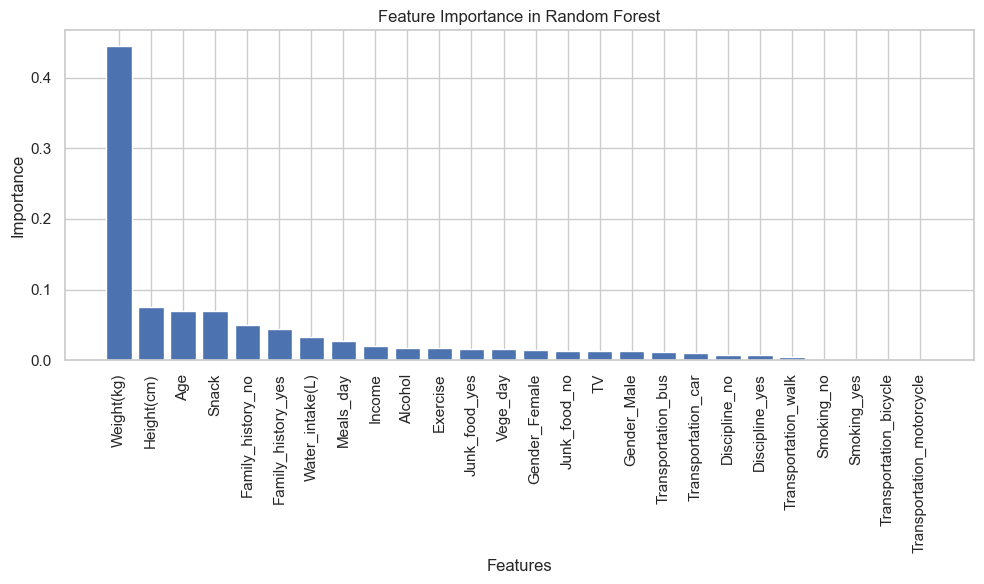

In [243]:
best_rf = grid_search_rf.best_estimator_
y_pred_best = best_rf.predict(X_test_tr)
feature_importance = best_rf.feature_importances_


# Sort features by importance
feature_importance_sorted = sorted(zip(feature_importance, all_feature_names), reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), [imp for imp, _ in feature_importance_sorted])
plt.xticks(range(len(feature_importance)), [name for _, name in feature_importance_sorted], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Coefficient Magnitude:

    Positive Coefficients: Indicate that an increase in the feature value is associated with an increased probability of the positive class.
    Negative Coefficients: Indicate that an increase in the feature value is associated with a decreased probability of the positive class.

In [ ]:
best_lr = grid_search_lr.best_estimator_

# Get the coefficients from the trained model
coefficients = best_lr.coef_.flatten()
for feature, coef in zip(all_feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

